## Пример использования программы muller

Загружаем код:

In [1]:
%pylab inline

import batch

pylab.rcParams['savefig.dpi'] = 96 # это чтобы графики были красивее
pylab.rcParams['figure.figsize'] = (9.0, 6.0) # размер графиков


Populating the interactive namespace from numpy and matplotlib


Зададим несколько популяций с различными параметрами:

In [2]:
pm = batch.population(N = 1000, G = 100, M = 0.01, Tmut = 0.05)
p = batch.population(N = 1000, G = 100, M = 0.01)
p05 = batch.population(N = 1000, G = 100, M = 0.01, T = 0.5)
p005 = batch.population(N = 1000, G = 100, M = 0.01, T = 0.05)


Tmut - мутация коэффициента трансформации.

Теперь для каждой популяции посчитаем эволюцию длиной в 20 тысяч шагов:

In [3]:
pm.run(20000); p05.run(20000); p005.run(20000); p.run(20000);

После нескольких минут, наконец, всё посчиталось. Чтобы воочию убедиться в этом, например, построим график средней доли хороших генов Е от времени для одной из популяций:

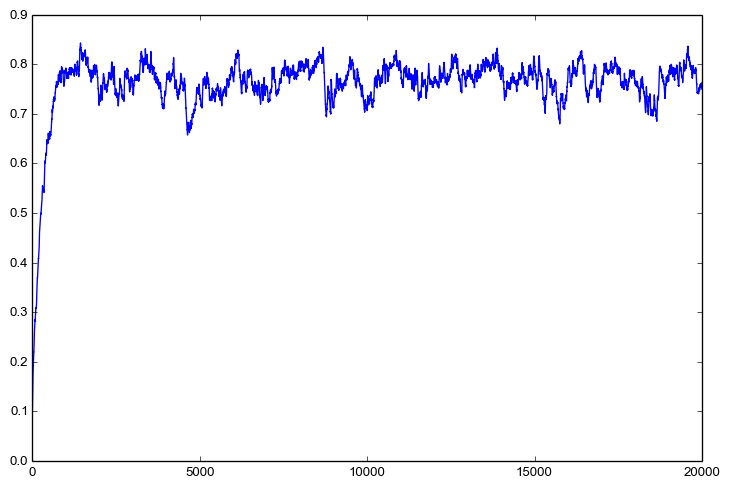

In [4]:
plot(pm.stat["Eavg"])

Можно даже построить все четыре графика:

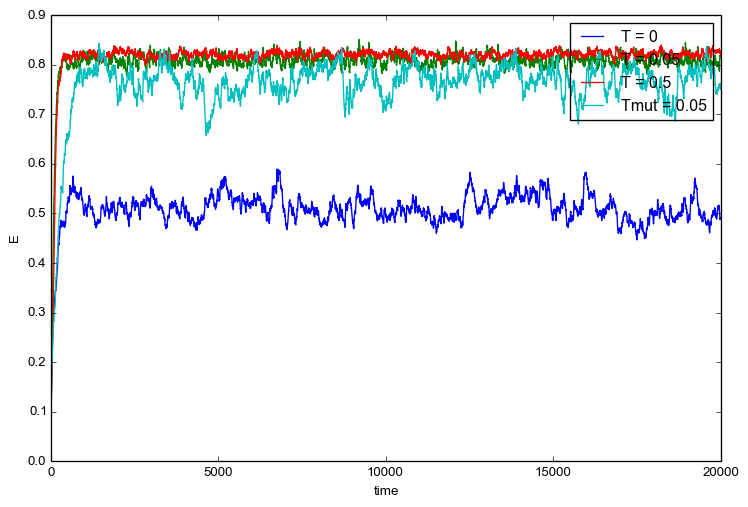

In [5]:
plot(p.stat["Eavg"], label = "T = 0")
plot(p005.stat["Eavg"], label = "T = 0.05")
plot(p05.stat["Eavg"], label = "T = 0.5")
plot(pm.stat["Eavg"], label = "Tmut = 0.05")
legend()
xlabel("time")
ylabel("E")

Проверим, выполняется ли основная теорема естественного отбора Фишера. Она гласит, что изменение средней приспособленности за счёт естественного отбора равно дисперсии приспособленности:

dF/dt = Var(F)

Поскольку в нашей модели на приспособленность влияют также мутации, необходимо учитывать и их. Это просто:

dF/dt (mut) = (B - E) * M

Сумма этих компонент и будет теоретическим предсказанием скорости изменения приспособленности в модели.

Сравним же практическое изменение приспособленности с теоретическим. Для наглядности также построим отдельно селекционную и мутационную компоненты предсказания.

Бесполый случай:

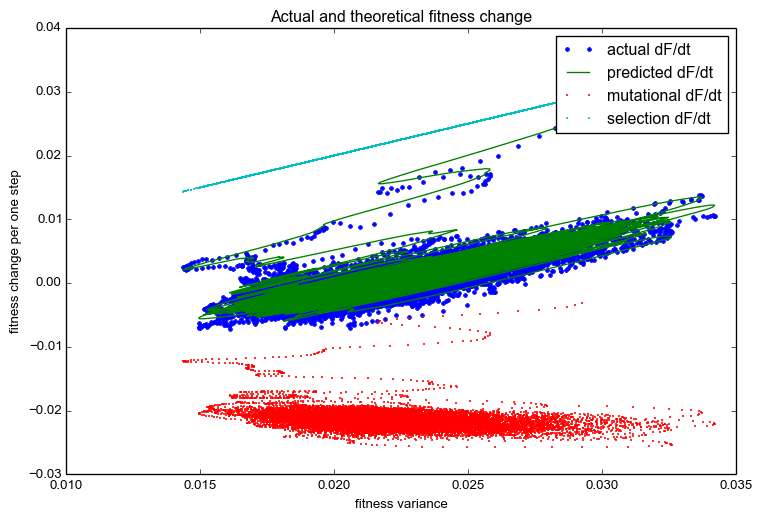

In [33]:
batch.fisher_plot(p) # T = 0

Видно, что практика с теорией сходятся достаточно неплохо, хотя и не совсем идеально.

Теперь рассмотрим половые случаи:

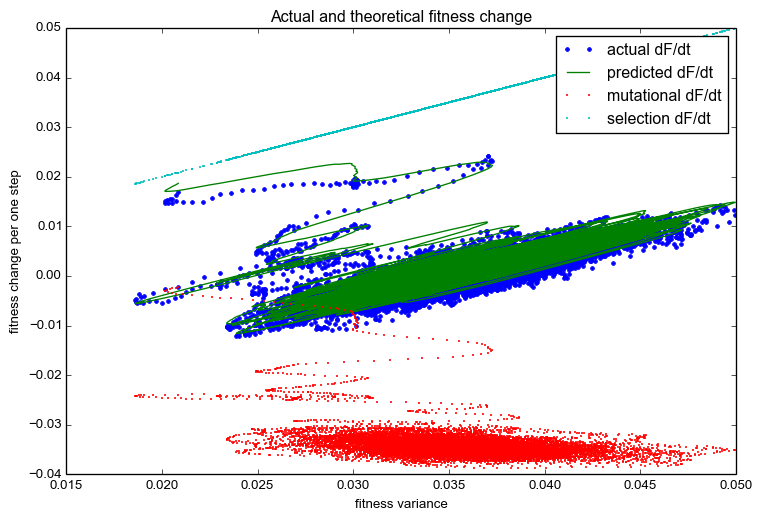

In [24]:
batch.fisher_plot(pm) # Tmut = 0.05


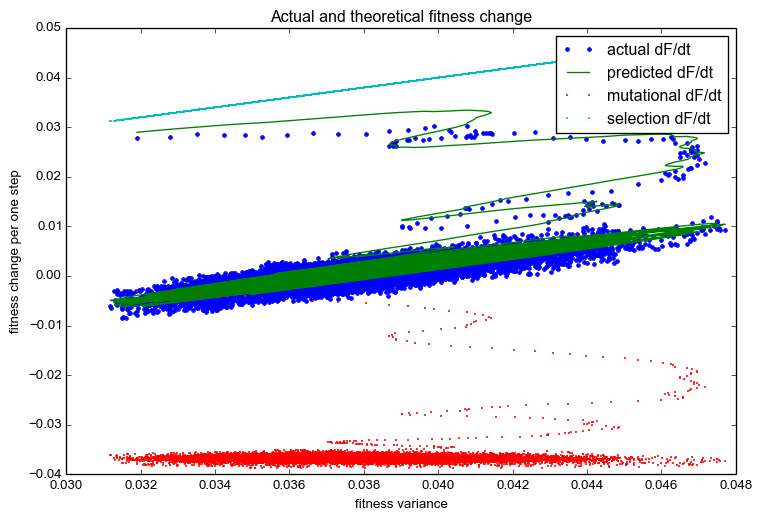

In [34]:
batch.fisher_plot(p005) # T = 0.05

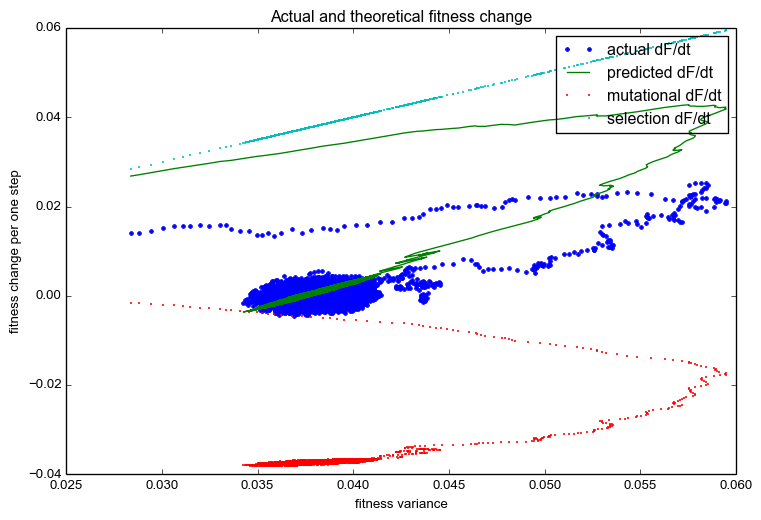

In [6]:
batch.fisher_plot(p05) # T = 0.5

В последнем случае (при трансформации 0,5) расхождение между моделью и предсказанием достигает немалых величин. Приспособленность меняется порою в два раза медленнее, чем должна. Хотя в окрестности точки равновесия она вновь начинает вести себя "хорошо".

Объясняется это, как оказалось просто. Когда происходит трансформация, донор выбирается из числа предков. Мотивация для такого решения проста - ежели бы доноры были из того же поколения, то те, кому посчастливилось стать донорами в начале, оставят больше копий своих генов, ибо их реципиенты также могут стать донорами чуть погодя. Но это не очень красиво и правдоподобно, поэтому я решил, что донорами будут предки.

Таким образом, после раунда отбора у потомков увеличивается приспособленность, но трансформация с коэффициентом 0,5 "разбавляет" их гены генами предков, так что итоговое изменение приспособленности оказывается приблизительно в два раза меньше.

Возможно, именно этот эффект я наблюдал, когда у меня получилось, что в половом случае скорость эволюции меньше.

Также это может приводить к такому эффекту, что при увеличении средней приспособленности трансформация оказывается невыгодной в силу того, что она будет разбавлять гены из менее приспособленного источника.

Избавиться от такого эффекта можно, например, беря доноров из того же поколения, но не заменяя трансформированных реципиентов, а записывая их в другой массив. Хотя это также не очень реалистично.

А вот так меняется коэффициент трансформации в случае, когда он мутирует. Быть может, при альтернативном алгоритме трансформации её средняя частота подрастёт:

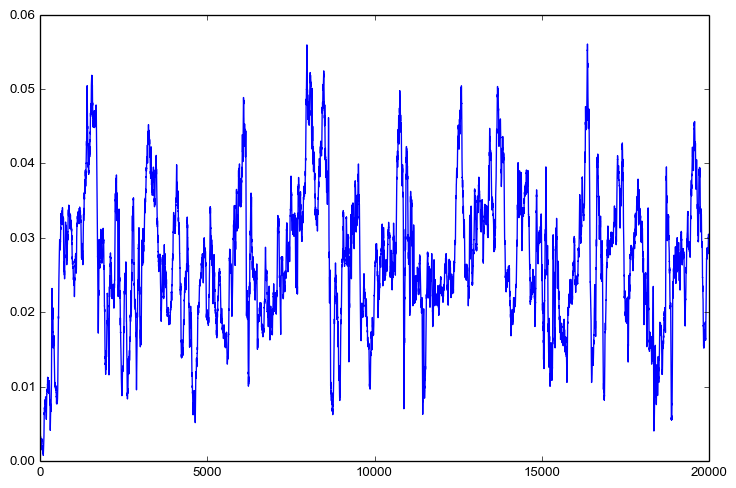

In [7]:
plot(pm.stat["Tavg"])

In [8]:
average(pm.stat["Tavg"])

0.026955664911454406